# ***INSURANCE PREDICTION***

#**1.Defining the question**

##**a.What is the specific question**

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria.
 Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not.

 You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, Claim, is a:



> 1 if the building has at least a claim over the insured period.

> 0 if the building doesn’t have a claim over the insured period.






##**b. What are the metrics of Success.**

- The metrics of success is to get an accuracy of 70% and above.

##**c. Understanding the context**

The data is from an insuarance company . We will use the predictor variable to check if a claim is to be given or not

##**d. Recording the experimental design**

We shall use Neural Networks. The MLP will be our main focus

##**e. Data Relevance**

The data was very relevant to the question

#**2.Read the Data**

In [ ]:
# Importing necessary libraries
#

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Loading both train and test data
#
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [ ]:
# Determining the no. of records in our dataset
#
print(train.shape)
print(test.shape)

(7160, 14)
(3069, 13)


#**3. Check the data**

In [ ]:
# Check datatypes of the columns
#

train.dtypes, test.dtypes

(Customer Id            object
 YearOfObservation       int64
 Insured_Period        float64
 Residential             int64
 Building_Painted       object
 Building_Fenced        object
 Garden                 object
 Settlement             object
 Building Dimension    float64
 Building_Type           int64
 Date_of_Occupancy     float64
 NumberOfWindows        object
 Geo_Code               object
 Claim                   int64
 dtype: object, Customer Id            object
 YearOfObservation       int64
 Insured_Period        float64
 Residential             int64
 Building_Painted       object
 Building_Fenced        object
 Garden                 object
 Settlement             object
 Building Dimension    float64
 Building_Type           int64
 Date_of_Occupancy     float64
 NumberOfWindows        object
 Geo_Code               object
 dtype: object)

In [ ]:
# Previewing the top of the train dataset
#

train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [ ]:
# Previewing the bottom of both datasets
# 

train.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [ ]:
test.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
3064,H11583,2015,1.0,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.0,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.0,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.0,0,V,V,V,U,NaN,1,1800.0,.,NaN
3068,H9021,2012,1.0,0,V,V,V,U,NaN,2,1950.0,.,NaN


In [ ]:
# Checking whether each column has an appropriate datatype
#

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


#**4.Tidying the data**

In [ ]:
# Check for missing values
#

train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [ ]:
# Dealing with null alues on the train data
#
train.mean()

YearOfObservation     2013.669553
Insured_Period           0.909758
Residential              0.305447
Building Dimension    1883.727530
Building_Type            2.186034
Date_of_Occupancy     1964.456404
Claim                    0.228212
dtype: float64

In [ ]:
train = train.fillna(train.mean())

In [ ]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [ ]:
train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [ ]:
train.shape

(7051, 14)

In [ ]:
test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
# Dealing with null nalues on the test data
#
test.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [ ]:
test.shape

(2324, 13)

In [ ]:
#test.mean()
test = test.fillna(test.mean())

In [ ]:
test.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [ ]:
test.shape

(2324, 13)

In [ ]:
# Check for duplicated values
#

train.duplicated().any()

False

In [ ]:
test.duplicated().any()

# Both sets do not have duplicates

False

In [ ]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [ ]:
# Renaming columns for both train and test data
#
train.rename(columns = {'Customer Id': 'Customer_Id', 'YearOfObservation':'Year_Of_Observation','Building Dimension':'Building_Dimension',
                        'NumberOfWindows':'Number_Of_Windows'}, inplace = True)


In [ ]:
test.rename(columns = {'Customer Id': 'Customer_Id', 'YearOfObservation':'Year_Of_Observation','Building Dimension':'Building_Dimension',
                        'NumberOfWindows':'Number_Of_Windows'}, inplace = True)

In [ ]:
train.head()

,Customer_Id,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,Number_Of_Windows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
print(train['Building_Painted'].unique())
print(train['Building_Fenced'].unique())
print(train['Garden'].unique())
print(train['Settlement'].unique())

['N' 'V']
['V' 'N']
['V' 'O']
['U' 'R']


In [ ]:
# Change the categorical values to numerical ones
#
train['Building_Painted'] = train['Building_Painted'].apply({'N':1, 'V':0}.get)
train.head()

# N = painted, V = not painted

,Customer_Id,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,Number_Of_Windows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
# Change the categorical values to numerical ones
#
train['Building_Fenced'] = train['Building_Fenced'].apply({'N':1, 'V':0}.get)
train.head()

# N = fenced, V = not fenced

,Customer_Id,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,Number_Of_Windows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
# Change the categorical values to numerical ones
#
train['Garden'] = train['Garden'].apply({'V':1, 'O':0}.get)
train.head()

# V = has garden, O = has no garden

,Customer_Id,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,Number_Of_Windows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0,R,680.0,1,1800.0,3,1053,0


In [ ]:
# Change the categorical values to numerical ones
#
train['Settlement'] = train['Settlement'].apply({'R':1, 'U':0}.get)
train.head()

# R = rural area, U = urban area

,Customer_Id,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,Number_Of_Windows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1,0,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0,1,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1,0,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1,0,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0,1,680.0,1,1800.0,3,1053,0


In [ ]:
# Sorting the number of windows column by changing it from string to integers without labelencoding to avoid loss of information as follows
#
train['Number_Of_Windows'] = train['Number_Of_Windows'].map(lambda x: x.lstrip('>=').rstrip('   .'))

In [ ]:
train['Number_Of_Windows'].unique()

# where there is 10 = >=10

array(['', '4', '3', '2', '5', '10', '6', '7', '9', '8', '1'],
      dtype=object)

In [ ]:
# Replacing the blank value with the mean of the other values
#
mean = train[['Number_Of_Windows']].mean()
print(mean)

# we round up the value to 4 to be used as below

Number_Of_Windows    inf
dtype: float64


In [ ]:
train['Number_Of_Windows'] = train['Number_Of_Windows'].replace({'': '4'})

In [ ]:
train['Number_Of_Windows'] = train['Number_Of_Windows'].astype(int)

In [ ]:
# Labelencoding other columns
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
train['Customer_Id']=le.fit_transform(train['Customer_Id'])
train['Geo_Code'] = le.fit_transform(train['Geo_Code'])
train['Geo_Code'] = le.fit_transform(train['Geo_Code'])

In [ ]:
train.dtypes

Customer_Id              int64
Year_Of_Observation      int64
Insured_Period         float64
Residential              int64
Building_Painted         int64
Building_Fenced          int64
Garden                   int64
Settlement               int64
Building_Dimension     float64
Building_Type            int64
Date_of_Occupancy      float64
Number_Of_Windows        int64
Geo_Code                 int64
Claim                    int64
dtype: object

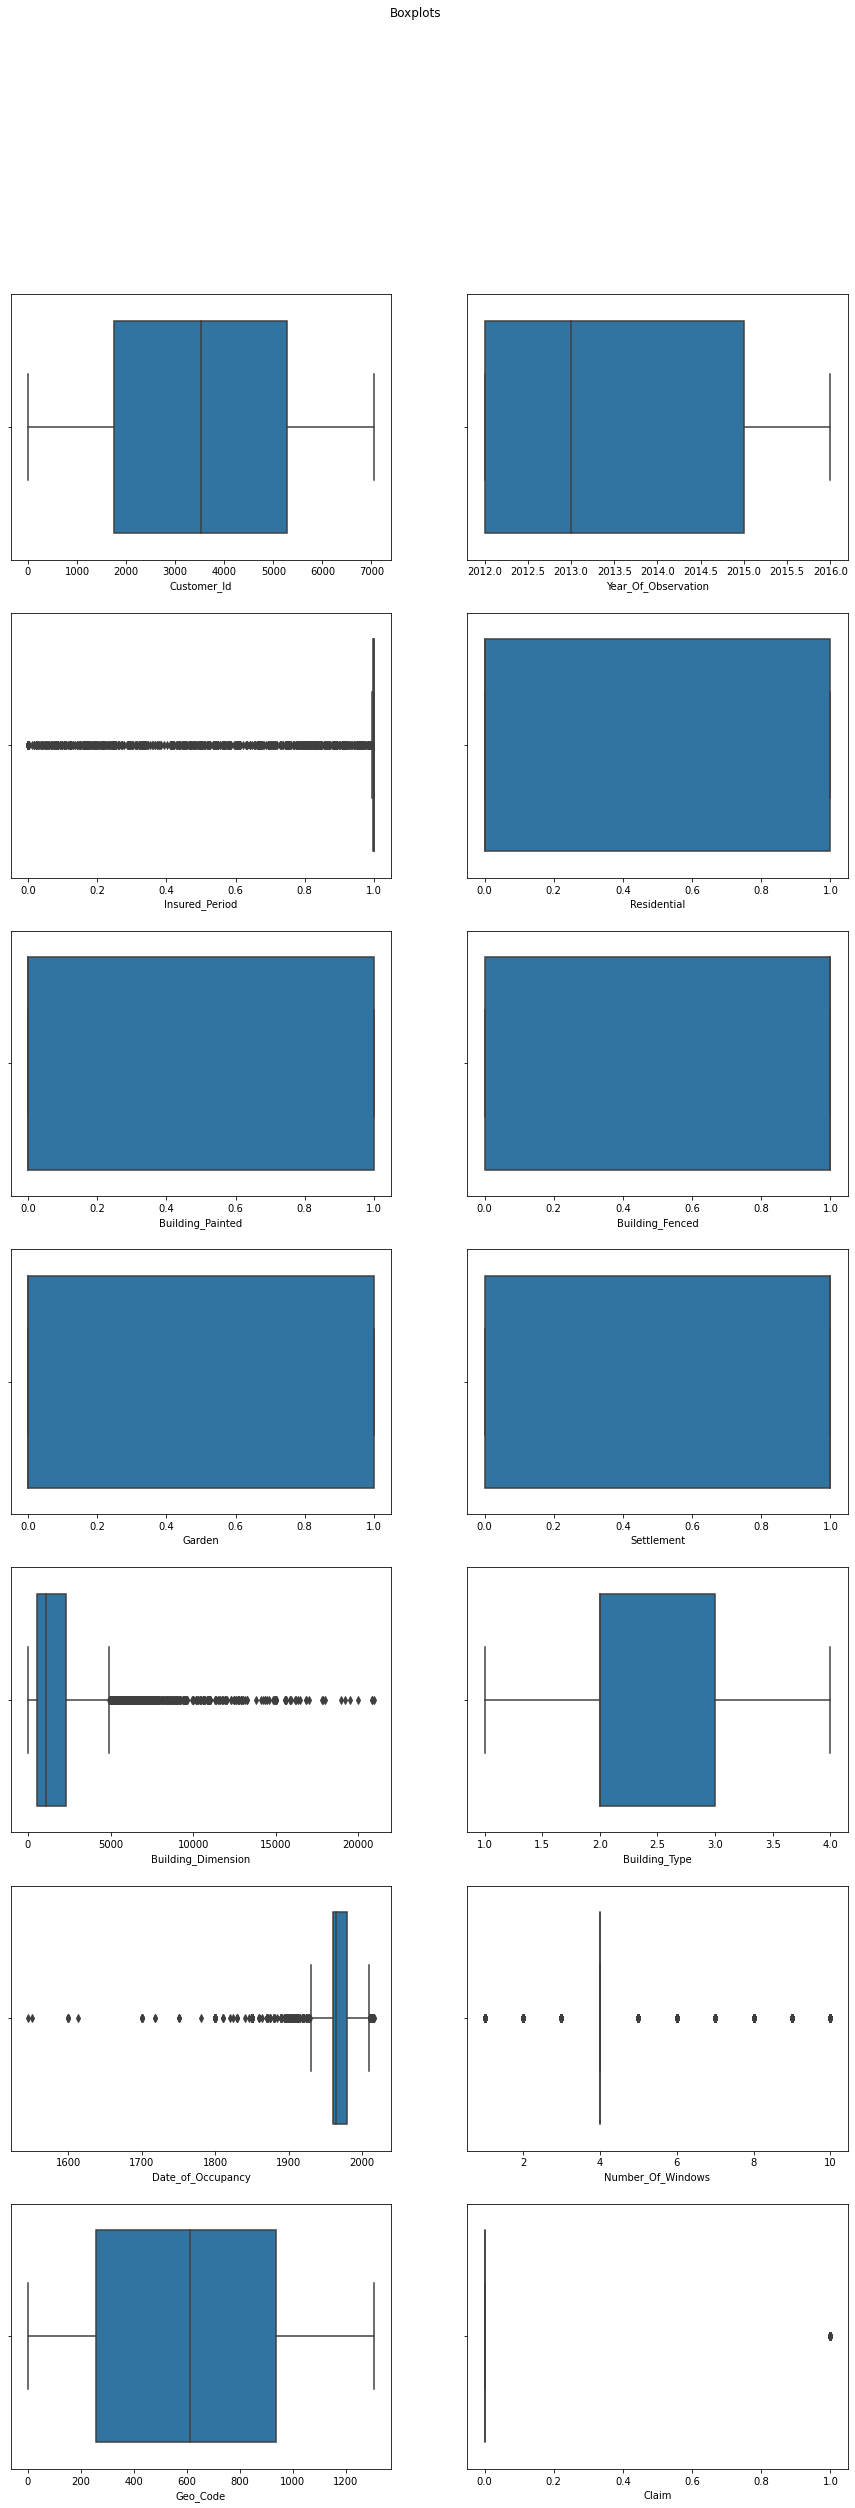

In [ ]:
# Checking for prescence of outliers on the train data using boxplots
#
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(15, 40))
	
fig.suptitle('Boxplots')

sns.boxplot(train['Customer_Id'], ax=ax1)
sns.boxplot(train['Year_Of_Observation'], ax=ax2)
sns.boxplot(train['Insured_Period'], ax=ax3)
sns.boxplot(train['Residential'], ax=ax4)
sns.boxplot(train['Building_Painted'], ax=ax5)
sns.boxplot(train['Building_Fenced'], ax=ax6)
sns.boxplot(train['Garden'], ax=ax7)
sns.boxplot(train['Settlement'], ax=ax8)
sns.boxplot(train['Building_Dimension'], ax=ax9)
sns.boxplot(train['Building_Type'], ax=ax10)
sns.boxplot(train['Date_of_Occupancy'], ax=ax11)
sns.boxplot(train['Number_Of_Windows'], ax=ax12)
sns.boxplot(train['Geo_Code'], ax=ax13)
sns.boxplot(train['Claim'], ax=ax14)


plt.show()


In [ ]:
train.columns

Index(['Customer_Id', 'Year_Of_Observation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'Number_Of_Windows', 'Geo_Code', 'Claim'],
      dtype='object')

In [ ]:
# Checking for Anomalies using Z-score
#
columns = train[['Customer_Id', 'Year_Of_Observation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'Number_Of_Windows', 'Geo_Code', 'Claim']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

[[1.20661376 0.48834631 0.37520132 ... 0.13037071 1.53835682 0.54462501]
 [0.21813376 0.95449041 0.37520132 ... 0.13037071 1.53835682 0.54462501]
 [0.67405297 0.23307205 0.37520132 ... 0.13037071 1.53835682 0.54462501]
 ...
 [1.55641385 0.95449041 0.37520132 ... 0.13037071 1.02731573 0.54462501]
 [1.18352303 0.48834631 0.37520132 ... 0.13037071 1.02477323 0.54462501]
 [1.41295651 0.48834631 0.37520132 ... 0.13037071 1.02223074 0.54462501]]


In [ ]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#

new_train= columns[(z < 4).all(axis=1)]
print(f"Previous dataframe size : {columns.shape[0]}")
print(f"New dataframe size: {new_train.shape[0]}")

Previous dataframe size : 7051
New dataframe size: 6858


In [ ]:
# Dealing with non numerical variables on test data before removing outliers
#
test['Building_Painted'] = test['Building_Painted'].apply({'N':1, 'V':0}.get)
test['Building_Fenced'] = test['Building_Fenced'].apply({'N':1, 'V':0}.get)
test['Garden'] = test['Garden'].apply({'V':1, 'O':0}.get)
test['Settlement'] = test['Settlement'].apply({'R':1, 'U':0}.get)

In [ ]:
test.head()

,Customer_Id,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,Number_Of_Windows,Geo_Code
0,H11920,2013,1.000000,0,0,1,0,1,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,0,1,0,1,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,0,0,1,0,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,0,1,0,1,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,0,1,0,1,1405.0,1,2004.0,3,3321


In [ ]:
test['Number_Of_Windows'].unique()

array(['3', '   .', '2', '4', '9', '5', '6', '8', '>=10', '7', '1'],
      dtype=object)

In [ ]:
# Sorting the number of windows column by changing it from string to integers without labelencoding to avoid loss of information as follows
#
test['Number_Of_Windows'] = test['Number_Of_Windows'].map(lambda x: x.lstrip('>=').rstrip('   .'))

In [ ]:
mean = test[['Number_Of_Windows']].mean()
print(mean)

#when we round up the mean it becomes 3

Number_Of_Windows    inf
dtype: float64


In [ ]:
test['Number_Of_Windows'] = test['Number_Of_Windows'].replace({'': '3'})

In [ ]:
test['Number_Of_Windows'] = test['Number_Of_Windows'].astype(int)

In [ ]:
# Labelencoding other columns
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
test['Customer_Id']=le.fit_transform(test['Customer_Id'])
test['Geo_Code'] = le.fit_transform(test['Geo_Code'])
test['Geo_Code'] = le.fit_transform(test['Geo_Code'])

In [ ]:
test.columns

Index(['Customer_Id', 'Year_Of_Observation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'Number_Of_Windows', 'Geo_Code'],
      dtype='object')

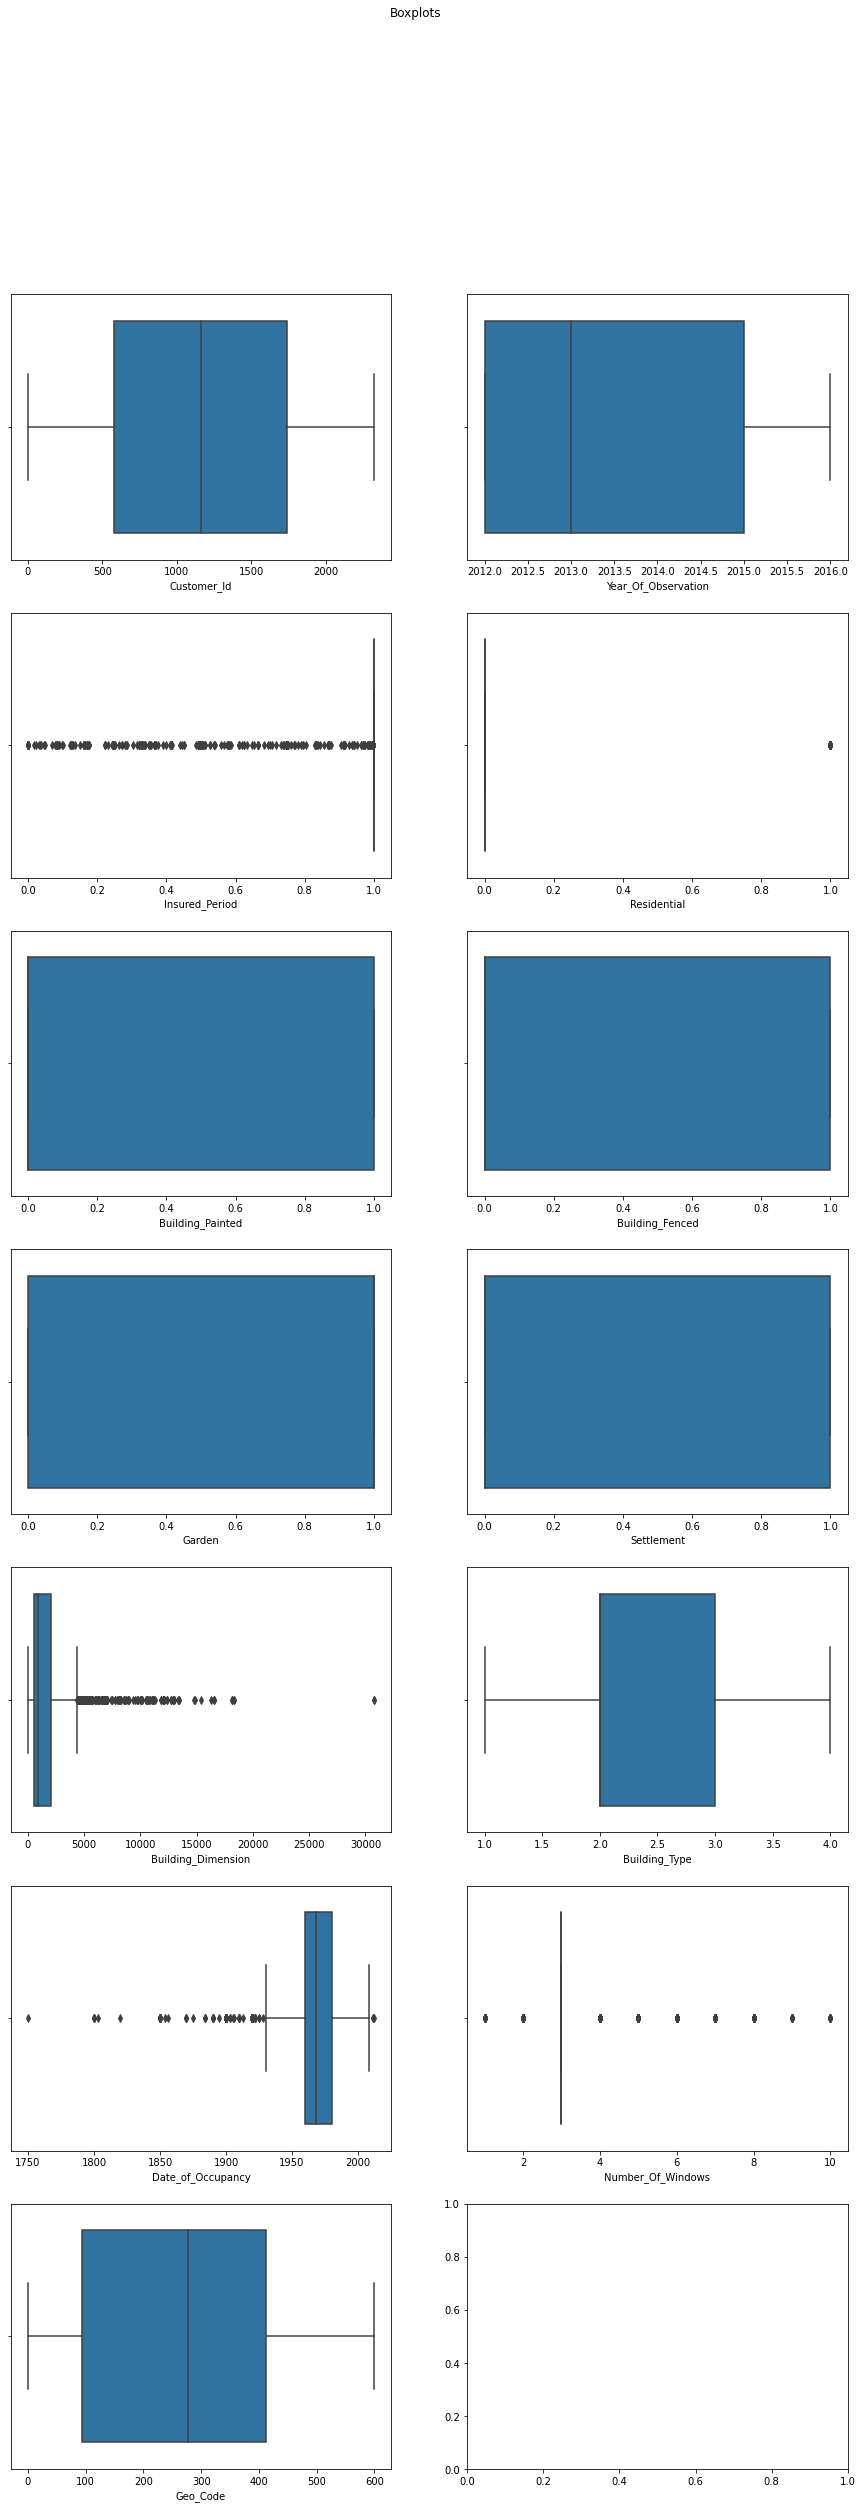

In [ ]:
# Checking for prescence of outliers on test set using boxplots
#
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(15, 40))
	
fig.suptitle('Boxplots')

sns.boxplot(test['Customer_Id'], ax=ax1)
sns.boxplot(test['Year_Of_Observation'], ax=ax2)
sns.boxplot(test['Insured_Period'], ax=ax3)
sns.boxplot(test['Residential'], ax=ax4)
sns.boxplot(test['Building_Painted'], ax=ax5)
sns.boxplot(test['Building_Fenced'], ax=ax6)
sns.boxplot(test['Garden'], ax=ax7)
sns.boxplot(test['Settlement'], ax=ax8)
sns.boxplot(test['Building_Dimension'], ax=ax9)
sns.boxplot(test['Building_Type'], ax=ax10)
sns.boxplot(test['Date_of_Occupancy'], ax=ax11)
sns.boxplot(test['Number_Of_Windows'], ax=ax12)
sns.boxplot(test['Geo_Code'], ax=ax13)



plt.show()

In [ ]:
# Checking for Anomalies using Z-score
#
columns = test[['Customer_Id', 'Year_Of_Observation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'Number_Of_Windows', 'Geo_Code']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

[[0.19899209 0.45406071 0.3262697  ... 0.27836443 0.38420302 0.77044231]
 [0.19750151 1.71423468 0.31239537 ... 0.27836443 0.38420302 0.77044231]
 [1.60013487 0.45406071 2.87357099 ... 0.27836443 0.38420302 0.77044231]
 ...
 [0.79522306 1.17682584 0.3262697  ... 0.27836443 0.38420302 0.93601017]
 [0.79671363 0.26870442 0.3262697  ... 0.52551123 0.38420302 0.93030093]
 [0.86975193 1.17682584 0.3262697  ... 0.52551123 0.38420302 0.9245917 ]]


In [ ]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#

new_test= columns[(z < 4).all(axis=1)]
print(f"Previous dataframe size : {columns.shape[0]}")
print(f"New dataframe size: {new_test.shape[0]}")

Previous dataframe size : 2324
New dataframe size: 2215


#**5.Exploratory Data Analysis**

## a) Univariate Analysis

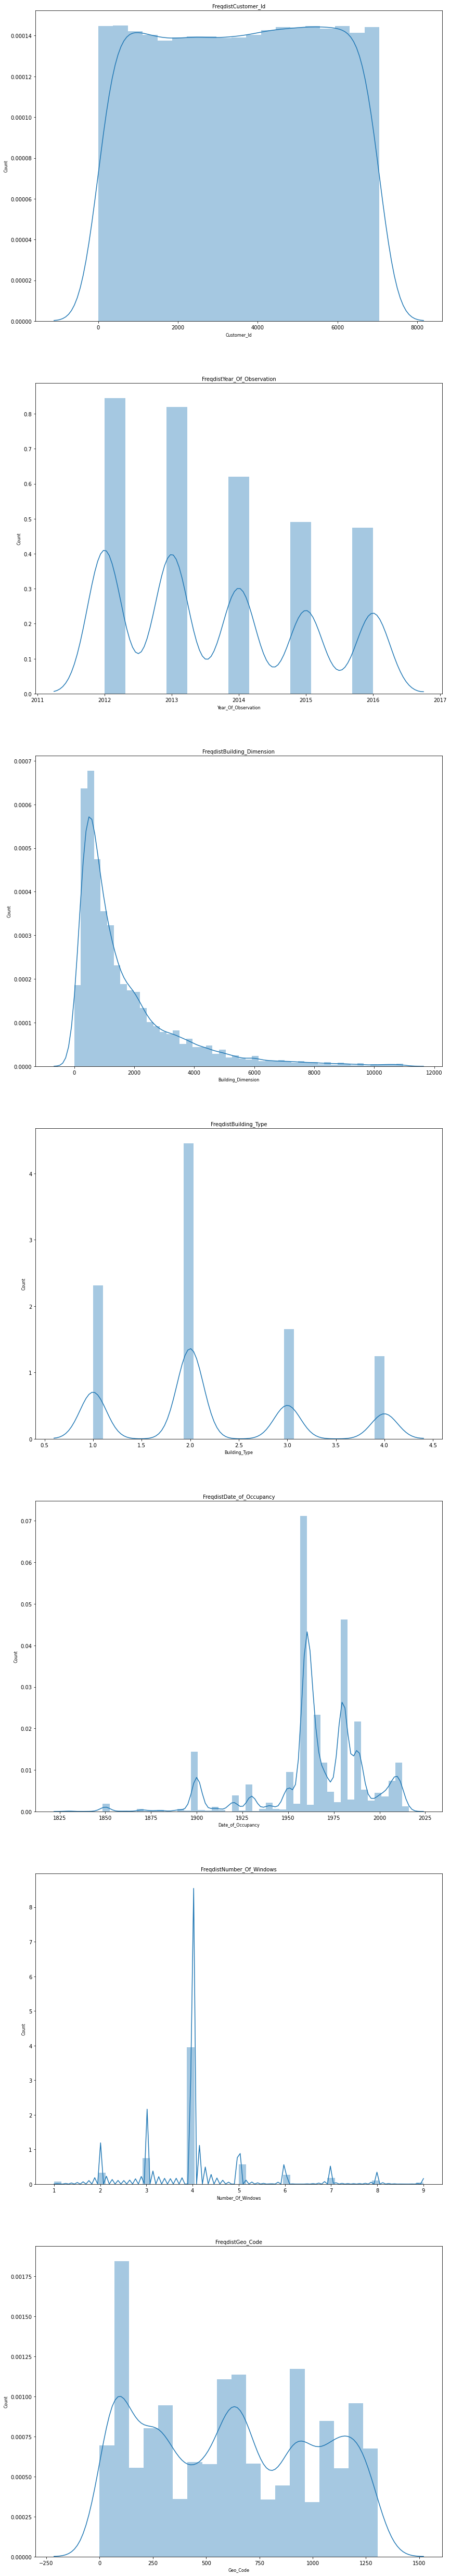

In [ ]:
# Train Dataset
# Plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF

column_names = ['Customer_Id', 'Year_Of_Observation', 'Building_Dimension',	'Building_Type',	'Date_of_Occupancy',
                'Number_Of_Windows',	'Geo_Code']

fig, ax = plt.subplots(len(column_names), figsize=(14,90))

for i, col_val in enumerate(column_names):
  sns.distplot(new_train[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Freqdist'+col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize = 8)

plt.show()

**Observation**

1. Year of observation and date of occupancy have a multimodal distribution
2. Most buildings have an average of 4 windows
3. Most buildings are of type 3

In [ ]:
train['Claim'].value_counts(). plot.bar(title = 'Frequency distribution of claim', color = 'green')

In [ ]:
train['Residential'].value_counts(). plot.bar(title = 'Frequency distribution of residential', color = 'lightblue')

In [ ]:
train['Building_Painted'].value_counts(). plot.bar(title = 'Frequency distribution of whether the building is painted', color = 'purple')

In [ ]:
train['Building_Fenced'].value_counts(). plot.bar(title = 'Frequency distribution of whether the building is fenced', color = 'red')

In [ ]:
train['Garden'].value_counts(). plot.bar(title = 'Frequency distribution of whether the building has a garden', color = 'maroon')

In [ ]:
train['Settlement'].value_counts(). plot.bar(title = 'Frequency distribution of whether the building is located', color = 'yellow')

**Observation**

1. Most buildings have made at least 1 claim during the insured period.
2. Most of the buildings are residential buildings.
3. Most of the buildings have been painted.
4. The buildings that have been fenced/not fenced, have a garden or not or located in the urban/rural area are almost the same number. None has a bigger proportion than the other.

## b) Bivariate Analysis

## c) Multivariate Analysis

#**6.Model**

##***a.Balancing the dataset***

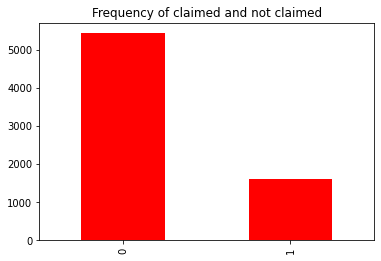

In [ ]:
#first we will check if the dat is balanced or not
train['Claim'].value_counts(). plot.bar(title = 'Frequency of claimed and not claimed', color = 'red')

since we have an unbalanced predictor variable we are going to do upsampling to make sure that both our X and Y train have the same records.

In [ ]:
# Define our X and y variables

X = train.drop('Claim', axis=1)
y = train.Claim
#Check the shapes
print(X.shape)
print(y.shape)

(7051, 13)
(7051,)


In [ ]:
# We will get the number of records for No(0) and Yes(1) on the colunm churn
#
no = train[train['Claim'] == 0]
yes = train[train['Claim'] == 1]

print(no.shape, yes.shape)

# Our dataset is imbalanced, we have 4261 records of no and 691 records of yes

(5438, 14) (1613, 14)


Since we have a small dataset and we don't want to lose any information we will perform upsampling(oversampling)
 We are going to use RandomOverSampler to to handle our imbalanced data

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(ratio = 1)
X_res, y_res = os.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# To confirm if the records are balanced
#
print(X_res.shape, y_res.shape)

(10876, 13) (10876,)


In [ ]:
# We are then going to compare the original y values with the balanced y values 
#

from collections import Counter

print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}". format(Counter(y_res)))

Original dataset shape Counter({0: 5438, 1: 1613})
Resampled dataset shape Counter({0: 5438, 1: 5438})


1    5438
0    5438
dtype: int64

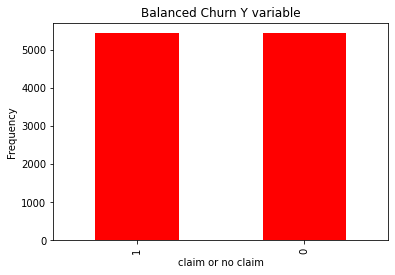

In [ ]:
pd.value_counts(y_res).plot.bar(color = 'red')
plt.title('Balanced Churn Y variable')
plt.xlabel('claim or no claim')
plt.ylabel('Frequency')
pd.value_counts(y_res)

##***b.Setting labels, and splitting the data***

In [ ]:
#1. Setting up our labels and features

X = train.drop('Claim', axis=1)
y = train.Claim

In [ ]:
X_train =new_train.drop(['Claim'],axis =1)
X_test = new_test.iloc[:,0:]
y_train = new_train[['Claim']]

##***c.Fitting and model performance***

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.00001, 0.5],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['lo

In [ ]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Now that we have our model in place, let's do the prediction

pred = mlp.predict(X_test)
pred



array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluating the performance of ur model
mlp.score(X_train, y_train)

0.691072203733179

In [ ]:
# Extracting the weights and bias vectors

# Checking the number of weights 
len(mlp.coefs_) 


2

In [ ]:
# Checking the number of biases 
len(mlp.intercepts_) 

2

**Conclusion**

The model had an accuracy of 69%. Our metric of success was if the model had an accuracy greater than 70%.

Since this is close enough, the model is suitable for implementation to predict the probability of having at least one claim over the insured period of the building.

# **7. Challenging the Solution**

Different optimization methods could be used to increase the accuracy of the MLP model.

An even wider range for the parameter grid when tuning the model could have been used.

# **8. Follow up questions**




***i). Did we have the right data?***


The data provided for this question was relevant and yielded good results



***ii). Do we need other data to answer our question?***

Yes. The data provided was sufficient to answer the question



***iii). Did we have the right question?***


The question was right for the data given.